In [1]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def rolling_price_volume_divergence_factor(df, window=20):
    price_returns = df['close'].pct_change()
    volume_change = df['volume'].pct_change()
    divergence = price_returns.rolling(window=window).mean() - volume_change.rolling(window=window).mean()
    return divergence

In [5]:
evaluator.set_factor(
    factor_data_or_func=rolling_price_volume_divergence_factor,
    factor_name='rolling_price_volume_divergence_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): -0.007869
   Rank_IC (Spearman): -0.004363
📊 信息比率:
   IR: -0.488763
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130132
   因子列: rolling_price_volume_divergence_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


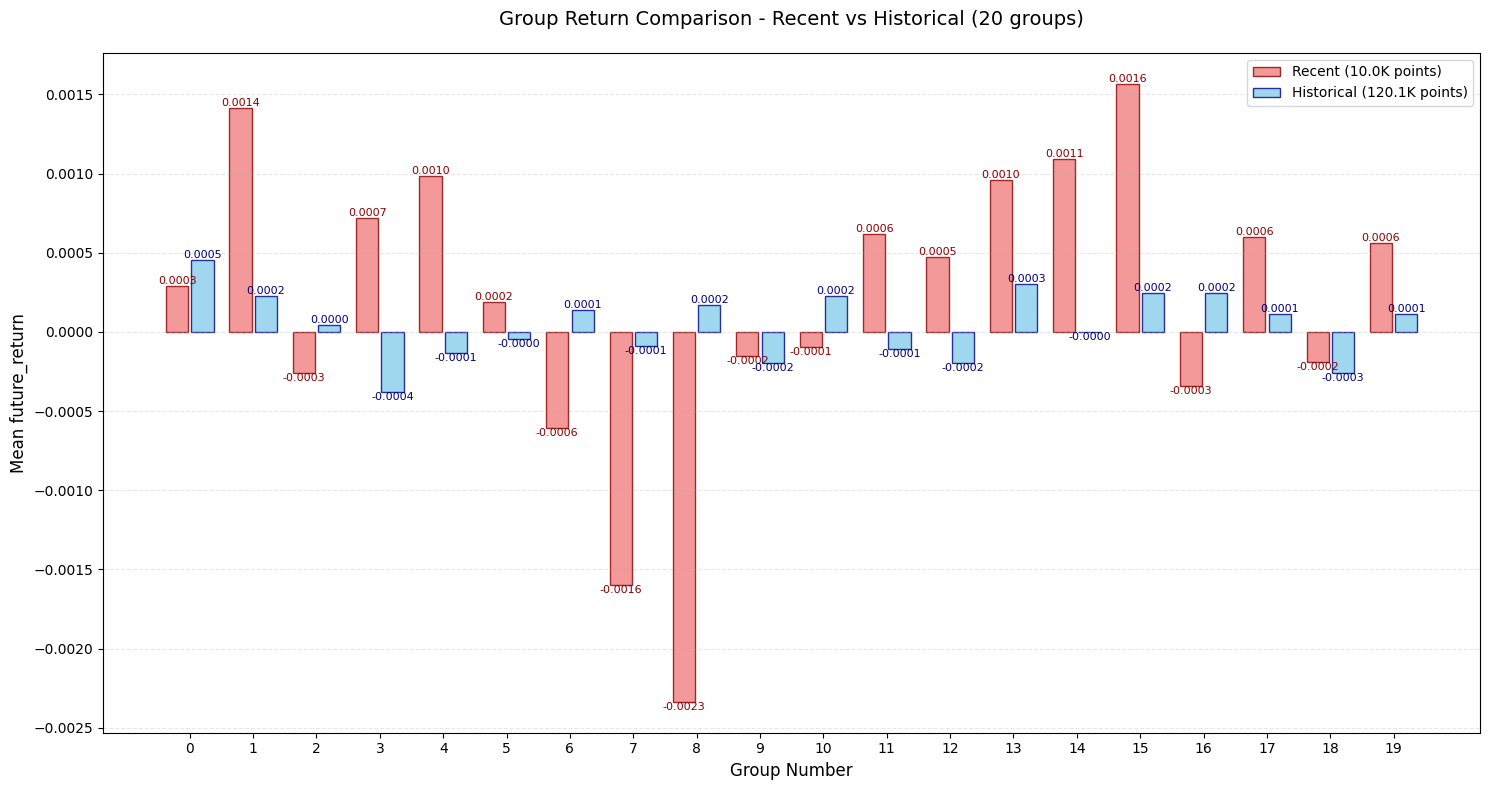

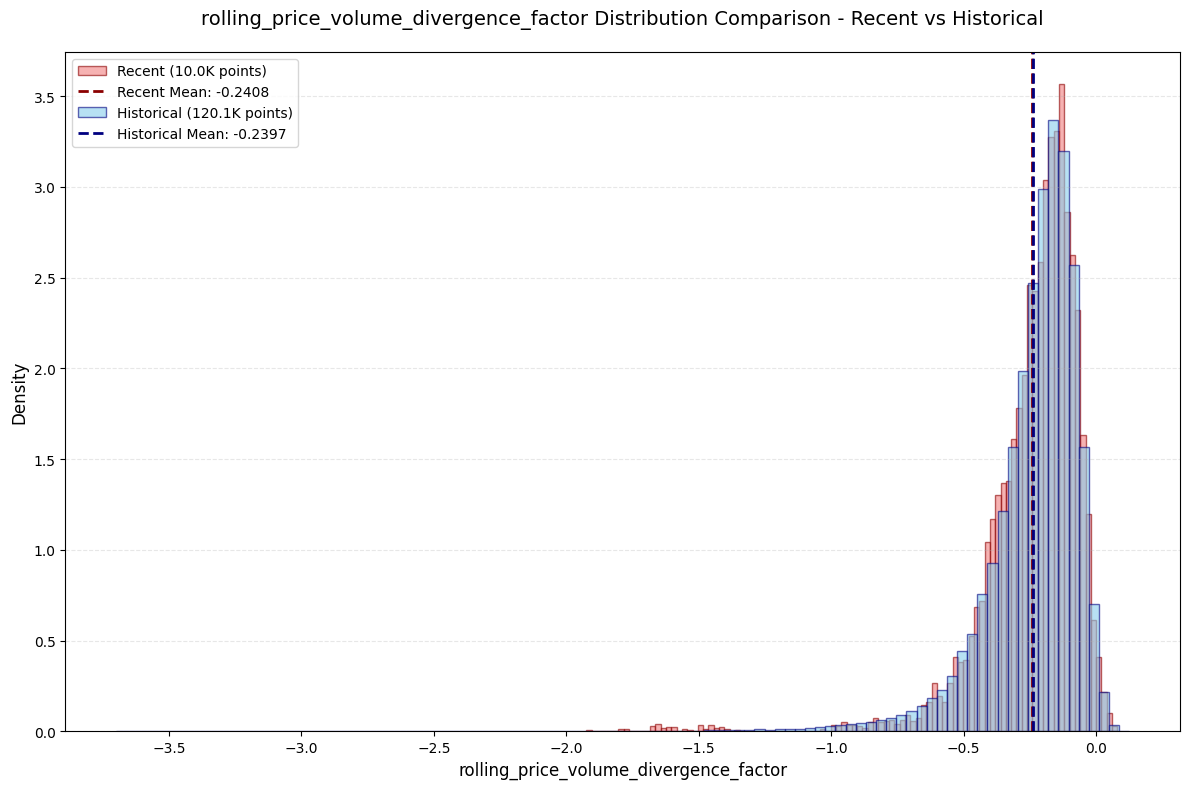

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)